In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import tensorflow as tf

In [ ]:
# tf.__version__

'2.11.0'

In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 81991, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 81991 (delta 291), reused 400 (delta 253), pack-reused 81534
Receiving objects: 100% (81991/81991), 596.35 MiB | 28.79 MiB/s, done.
Resolving deltas: 100% (58467/58467), done.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
cd /content
git clone https://github.com/cocodataset/cocoapi.git
cd /content/cocoapi/PythonAPI
make
cp -r pycocotools /content/models/research/
cd /content/models/research/
cp object_detection/packages/tf2/setup.py .
python -m pip install .
cd /content

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

In [ ]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

In [ ]:
# !python -m pip install -U pip
# !python -m pip install -U matplotlib

In [ ]:
!pip install -q tflite-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.3 MB/s et

In [ ]:
import numpy as np
import os
import shutil
import random
from lxml import etree
import re
import xml.etree.ElementTree as ET

import tensorflow as tf


In [ ]:
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
# from tensorflow_datasets.core.utils.lazy_imports_utils import tensorflow as tf
# import tensorflow_datasets.public_api as tfds

In [ ]:
from object_detection.utils import dataset_util

In [ ]:
!mkdir dataset

In [ ]:
%cd dataset

/content/dataset


In [ ]:
!curl -O https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!curl -O https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755M  100  755M    0     0  28.6M      0  0:00:26  0:00:26 --:--:-- 30.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.2M  100 18.2M    0     0  10.9M      0  0:00:01  0:00:01 --:--:-- 10.9M


In [ ]:
# !tar -xvf /content/drive/MyDrive/datasets/OxFordPetIII/annotations.tar.gz

In [ ]:
# !tar -xvf /content/drive/MyDrive/datasets/OxFordPetIII/images.tar.gz

In [ ]:
data_dir = "/content/dataset"

In [ ]:
%cd /content

/content


In [ ]:
image_dir = os.path.join(data_dir, 'images')
annotations_dir = os.path.join(data_dir, 'annotations')
examples_path = os.path.join(annotations_dir, 'trainval.txt')
examples_list = dataset_util.read_examples_list(examples_path)

In [ ]:
print(image_dir)
print(annotations_dir)
print(examples_path)
print(examples_list)
print("examples_list size=", len(examples_list))

/content/dataset/images
/content/dataset/annotations
/content/dataset/annotations/trainval.txt
['Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102', 'Abyssinian_103', 'Abyssinian_104', 'Abyssinian_105', 'Abyssinian_106', 'Abyssinian_107', 'Abyssinian_108', 'Abyssinian_109', 'Abyssinian_10', 'Abyssinian_110', 'Abyssinian_111', 'Abyssinian_112', 'Abyssinian_113', 'Abyssinian_114', 'Abyssinian_115', 'Abyssinian_116', 'Abyssinian_117', 'Abyssinian_118', 'Abyssinian_119', 'Abyssinian_11', 'Abyssinian_120', 'Abyssinian_121', 'Abyssinian_122', 'Abyssinian_123', 'Abyssinian_124', 'Abyssinian_125', 'Abyssinian_126', 'Abyssinian_127', 'Abyssinian_128', 'Abyssinian_129', 'Abyssinian_12', 'Abyssinian_130', 'Abyssinian_131', 'Abyssinian_132', 'Abyssinian_133', 'Abyssinian_134', 'Abyssinian_135', 'Abyssinian_136', 'Abyssinian_137', 'Abyssinian_138', 'Abyssinian_139', 'Abyssinian_13', 'Abyssinian_140', 'Abyssinian_141', 'Abyssinian_142', 'Abyssinian_143', 'Abyssinian_144', 'Abyssinian_145', 'america

In [ ]:
# Test images are not included in the downloaded data set, so we shall perform
# our own split.
random.seed(42)
random.shuffle(examples_list)
num_examples = len(examples_list)
num_train = int(0.7 * num_examples)
train_examples = examples_list[:num_train]
val_examples = examples_list[num_train:]
print('%d training and %d validation examples.',
              len(train_examples), len(val_examples))

%d training and %d validation examples. 2576 1104


In [ ]:
use_custom_dataset=True

In [ ]:
dataset_is_split=True

In [ ]:
if use_custom_dataset:
  
  # Your labels map as a dictionary (zero is reserved):
  label_map = {1: 'Abyssinian', 2: 'american_bulldog', 3: 'american_pit_bull_terrier', 4: 'basset_hound', 5: 'beagle',
               6: 'Bengal', 7: 'Birman', 8: 'Bombay', 9: 'boxer', 10: 'British_Shorthair',
               11: 'chihuahua', 12: 'Egyptian_Mau', 13: 'english_cocker_spaniel', 14: 'english_setter', 15: 'german_shorthaired', 
               16: 'great_pyrenees', 17: 'havanese', 18: 'japanese_chin', 19: 'keeshond', 20: 'leonberger',
               21: 'Maine_Coon', 22: 'miniature_pinscher', 23: 'newfoundland', 24: 'Persian', 25: 'pomeranian',
               26: 'pug', 27: 'Ragdoll', 28: 'Russian_Blue', 29: 'saint_bernard', 30: 'samoyed',
               31: 'scottish_terrier', 32: 'shiba_inu', 33: 'Siamese', 34: 'Sphynx', 35: 'staffordshire_bull_terrier',
               36: 'wheaten_terrier', 37: 'yorkshire_terrier' } 

  if dataset_is_split:
    # If your dataset is already split, specify each path:
    train_images_dir = '/content/dataset/train/images'
    train_annotations_dir = '/content/dataset/train/annotations'
    val_images_dir = '/content/dataset/validation/images'
    val_annotations_dir = '/content/dataset/validation/annotations'
    test_images_dir = '/content/dataset/test/images'
    test_annotations_dir = '/content/dataset/test/annotations'
  else:
    # If it's NOT split yet, specify the path to all images and annotations
    images_in = '/content/dataset/images'
    annotations_in = '/content/dataset/annotations'
  

In [ ]:
!mkdir "/content/dataset/train"

In [ ]:
!mkdir "/content/dataset/train/images"

In [ ]:
!mkdir "/content/dataset/train/annotations"

In [ ]:
!mkdir "/content/dataset/validation"

In [ ]:
!mkdir "/content/dataset/validation/images"

In [ ]:
!mkdir '/content/dataset/validation/annotations'

In [ ]:
def get_class_name_from_filename(file_name):
  """Gets the class name from a file.

  Args:
    file_name: The file name to get the class name from.
               ie. "american_pit_bull_terrier_105.jpg"

  Returns:
    A string of the class name.
  """
  match = re.match(r'([A-Za-z_]+)(_[0-9]+\.jpg)', file_name, re.I)
  return match.groups()[0]

In [ ]:
def adjust_to_annotation(data,target_path):
      
  class_name = get_class_name_from_filename(data['filename']) 
  targetXML = open(target_path, 'rt', encoding='UTF8')
  tree = ET.parse(targetXML)

  root = tree.getroot() #
  objcount = 0

  for obj in root.findall('object'):
    if (objcount > 0):
      print("objcount > 0:", targetXML) 
    
    name_tag = obj.find('name')
    
    name_tag.text = class_name 

    objcount += 1
  
  tree.write(target_path)  

  
  

In [ ]:
# xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# #XML 파일을 Parsing 하여 Element 생성
# tree = ET.parse(xml_file) #트리를 만든다
# root = tree.getroot() #루트를 가져온다

# #image 관련 정보는 root의 자식으로 존재
# image_name = root.find('filename').text #루트에서 파일 이름 가져온다
# full_image_name = os.path.join(IMAGE_DIR, image_name)
# image_size = root.find('size')
# image_width = int(image_size.find('width').text) #size에서 다시 find를 하면 size의 width를 가져온다
# image_height = int(image_size.find('height').text)

# #파일내에 있는 모든 object Element를 찾음
# objects_list = []
# for obj in root.findall('object'): #모든 object
#     #object element의 자식 element에서 bndbox를 찾음
#     name_tag = obj.find('name')
    
    
    
#     class_name=obj.find('name').text
#     object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos} #딕셔너리
#     objects_list.append(object_dict) #리스트에 넣는다

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
for idx, example in enumerate(train_examples):
      xml_path = os.path.join(annotations_dir, 'xmls', example + '.xml')
      # print(xml_path)
      if not os.path.exists(xml_path):
        print("no xml...:", xml_path)
        continue

      with tf.gfile.GFile(xml_path, 'r') as fid:
        xml_str = fid.read()
      xml = etree.fromstring(xml_str)
      data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']

      img_path = os.path.join(image_dir, data['filename'])
      # print(img_path)

      trainimgsource = img_path
      trainimgdestination = os.path.join(train_images_dir, data['filename'])
      shutil.copyfile(trainimgsource, trainimgdestination)
      # print(destination)

      trainxmlsource = xml_path
      trainxmldestination = os.path.join(train_annotations_dir, example + '.xml')
      shutil.copyfile(trainxmlsource, trainxmldestination)

      with tf.gfile.GFile(trainxmldestination, 'r') as fid:
        xml_str = fid.read()
      xml = etree.fromstring(xml_str)
      data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']
      
      adjust_to_annotation(data, trainxmldestination)
      

/usr/local/lib/python3.9/dist-packages/object_detection/utils/dataset_util.py:83: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:


no xml...: /content/dataset/annotations/xmls/Egyptian_Mau_14.xml
no xml...: /content/dataset/annotations/xmls/saint_bernard_15.xml
no xml...: /content/dataset/annotations/xmls/Ragdoll_199.xml
no xml...: /content/dataset/annotations/xmls/Egyptian_Mau_186.xml
no xml...: /content/dataset/annotations/xmls/Bengal_175.xml
no xml...: /content/dataset/annotations/xmls/samoyed_10.xml
no xml...: /content/dataset/annotations/xmls/Egyptian_Mau_156.xml
no xml...: /content/dataset/annotations/xmls/Abyssinian_104.xml


In [ ]:
for idx, example in enumerate(val_examples):
      xml_path = os.path.join(annotations_dir, 'xmls', example + '.xml')
      # print(xml_path)
      if not os.path.exists(xml_path):
        print("no xml...:", xml_path)
        continue

      with tf.gfile.GFile(xml_path, 'r') as fid:
        xml_str = fid.read()
      xml = etree.fromstring(xml_str)
      data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']

      img_path = os.path.join(image_dir, data['filename'])
      # print(img_path)

      valimgsource = img_path
      valimgdestination = os.path.join(val_images_dir, data['filename'])
      shutil.copyfile(valimgsource, valimgdestination)
      # print(destination)

      valxmlsource = xml_path
      valxmldestination = os.path.join(val_annotations_dir, example + '.xml')
      shutil.copyfile(valxmlsource, valxmldestination)

      with tf.gfile.GFile(valxmldestination, 'r') as fid:
        xml_str = fid.read()
      xml = etree.fromstring(xml_str)
      data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']
      adjust_to_annotation(data, valxmldestination)
      

objcount > 0: <_io.TextIOWrapper name='/content/dataset/validation/annotations/Bengal_105.xml' mode='rt' encoding='UTF8'>
no xml...: /content/dataset/annotations/xmls/Bengal_111.xml


In [ ]:
# We need to instantiate a separate DataLoader for each split dataset
if use_custom_dataset:
  if dataset_is_split:
    train_data = object_detector.DataLoader.from_pascal_voc(
        train_images_dir, train_annotations_dir, label_map=label_map)
    validation_data = object_detector.DataLoader.from_pascal_voc(
        val_images_dir, val_annotations_dir, label_map=label_map)
    # test_data = object_detector.DataLoader.from_pascal_voc(
    #     test_images_dir, test_annotations_dir, label_map=label_map)
  else:
    train_dir, val_dir, test_dir = split_dataset(images_in, annotations_in,
                                                 val_split=0.2, test_split=0.2,
                                                 out_path='split-dataset')
    train_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(train_dir, 'images'),
        os.path.join(train_dir, 'annotations'), label_map=label_map)
    validation_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(val_dir, 'images'),
        os.path.join(val_dir, 'annotations'), label_map=label_map)
    test_data = object_detector.DataLoader.from_pascal_voc(
        os.path.join(test_dir, 'images'),
        os.path.join(test_dir, 'annotations'), label_map=label_map)
    
  print(f'train count: {len(train_data)}')
  print(f'validation count: {len(validation_data)}')
  # print(f'test count: {len(test_data)}')

train count: 2568
validation count: 1103


In [ ]:
import tensorflow as tf

In [ ]:
spec = object_detector.EfficientDetLite1Spec()

In [ ]:
model = object_detector.create(train_data=train_data, 
                               model_spec=spec, 
                               validation_data=validation_data, 
                               epochs=100, 
                               batch_size=32, 
                               train_whole_model=True)

Epoch 1/100
80/80 [==============================] - 116s 813ms/step - det_loss: 1.9065 - cls_loss: 1.5285 - box_loss: 0.0076 - reg_l2_loss: 0.0768 - loss: 1.9833 - learning_rate: 0.0240 - gradient_norm: 1.0927 - val_det_loss: 1.6446 - val_cls_loss: 1.3801 - val_box_loss: 0.0053 - val_reg_l2_loss: 0.0768 - val_loss: 1.7214
Epoch 2/100
80/80 [==============================] - 60s 756ms/step - det_loss: 1.1518 - cls_loss: 0.9905 - box_loss: 0.0032 - reg_l2_loss: 0.0771 - loss: 1.2289 - learning_rate: 0.0400 - gradient_norm: 1.8007 - val_det_loss: 1.1455 - val_cls_loss: 0.9228 - val_box_loss: 0.0045 - val_reg_l2_loss: 0.0775 - val_loss: 1.2230
Epoch 3/100
80/80 [==============================] - 60s 756ms/step - det_loss: 0.8638 - cls_loss: 0.7299 - box_loss: 0.0027 - reg_l2_loss: 0.0778 - loss: 0.9416 - learning_rate: 0.0399 - gradient_norm: 1.7141 - val_det_loss: 0.8879 - val_cls_loss: 0.7407 - val_box_loss: 0.0029 - val_reg_l2_loss: 0.0780 - val_loss: 0.9659
Epoch 4/100
80/80 [========

In [ ]:
model.evaluate(validation_data)

18/18 [==============================] - 86s 1s/step



{'AP': 0.7773538,
 'AP50': 0.8906873,
 'AP75': 0.8642456,
 'APs': -1.0,
 'APm': 0.7190023,
 'APl': 0.78954864,
 'ARmax1': 0.84111863,
 'ARmax10': 0.8611381,
 'ARmax100': 0.86185795,
 'ARs': -1.0,
 'ARm': 0.7949793,
 'ARl': 0.87054765,
 'AP_/Abyssinian': 0.81999904,
 'AP_/american_bulldog': 0.71611506,
 'AP_/american_pit_bull_terrier': 0.6170331,
 'AP_/basset_hound': 0.7461596,
 'AP_/beagle': 0.63270503,
 'AP_/Bengal': 0.5816742,
 'AP_/Birman': 0.8038856,
 'AP_/Bombay': 0.8877876,
 'AP_/boxer': 0.7264094,
 'AP_/British_Shorthair': 0.86923236,
 'AP_/chihuahua': 0.73863375,
 'AP_/Egyptian_Mau': 0.71734446,
 'AP_/english_cocker_spaniel': 0.7579777,
 'AP_/english_setter': 0.81476885,
 'AP_/german_shorthaired': 0.8791325,
 'AP_/great_pyrenees': 0.7543998,
 'AP_/havanese': 0.72759056,
 'AP_/japanese_chin': 0.740534,
 'AP_/keeshond': 0.8339719,
 'AP_/leonberger': 0.81588036,
 'AP_/Maine_Coon': 0.8545316,
 'AP_/miniature_pinscher': 0.63528544,
 'AP_/newfoundland': 0.7682901,
 'AP_/Persian': 0.8

In [ ]:
TFLITE_FILENAME = 'efficientdet-lite-oxfordIII.tflite'
LABELS_FILENAME = 'oxfordIII-labels.txt'

In [ ]:
model.export(export_dir='.', tflite_filename=TFLITE_FILENAME, label_filename=LABELS_FILENAME,
             export_format=[ExportFormat.TFLITE, ExportFormat.LABEL])

In [ ]:
model.evaluate_tflite(TFLITE_FILENAME, validation_data)

In [ ]:
!mkdir /content/dataset/test

In [ ]:
!mkdir /content/dataset/test/images

In [ ]:
import random

# If you're using a custom dataset, we take a random image from the test set:
if use_custom_dataset:
  images_path = test_images_dir if dataset_is_split else os.path.join(test_dir, "images")
  filenames = os.listdir(os.path.join(images_path))
  random_index = random.randint(0,len(filenames)-1)
  INPUT_IMAGE = os.path.join(images_path, filenames[random_index])
# else:
#   # Download a test salad image
#   INPUT_IMAGE = 'salad-test.jpg'
#   DOWNLOAD_URL = "https://storage.googleapis.com/cloud-ml-data/img/openimage/3/2520/3916261642_0a504acd60_o.jpg"
#   !wget -q -O $INPUT_IMAGE $DOWNLOAD_URL

In [ ]:
INPUT_IMAGE="/content/dataset/test/images/chihuahua_t_1.jfif"

In [ ]:
! python3 -m pip install --extra-index-url https://google-coral.github.io/py-repo/ pycoral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.8 MB/s eta 0:00:00


In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

import tflite_runtime.interpreter as tflite 
from pycoral.adapters import common
from pycoral.adapters import detect
from pycoral.utils.dataset import read_label_file

In [ ]:


def draw_objects(draw, objs, scale_factor, labels):
  """Draws the bounding box and label for each object."""
  COLORS = np.random.randint(0, 255, size=(len(labels), 3), dtype=np.uint8)
  for obj in objs:
    bbox = obj.bbox
    color = tuple(int(c) for c in COLORS[obj.id])
    draw.rectangle([(bbox.xmin * scale_factor, bbox.ymin * scale_factor),
                    (bbox.xmax * scale_factor, bbox.ymax * scale_factor)],
                   outline=color, width=3)
    font = ImageFont.truetype("LiberationSans-Regular.ttf", size=15)
    draw.text((bbox.xmin * scale_factor + 4, bbox.ymin * scale_factor + 4),
              '%s\n%.2f' % (labels.get(obj.id, obj.id), obj.score),
              fill=color, font=font)

# Load the TF Lite model
labels = read_label_file(LABELS_FILENAME)
interpreter = tflite.Interpreter(TFLITE_FILENAME)
interpreter.allocate_tensors()



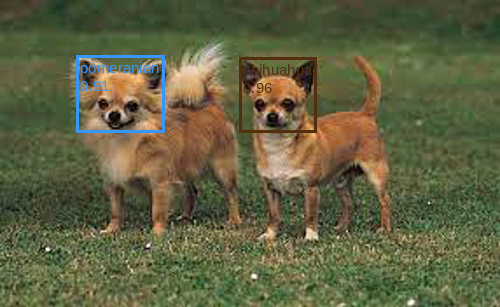

In [ ]:
# Resize the image for input
image = Image.open(INPUT_IMAGE)
_, scale = common.set_resized_input(
    interpreter, image.size, lambda size: image.resize(size, Image.ANTIALIAS))

# Run inference
interpreter.invoke()
objs = detect.get_objects(interpreter, score_threshold=0.4, image_scale=scale)

# Resize again to a reasonable size for display
display_width = 500
scale_factor = display_width / image.width
height_ratio = image.height / image.width
image = image.resize((display_width, int(display_width * height_ratio)))
draw_objects(ImageDraw.Draw(image), objs, scale_factor, labels)
image